# 第5回 確率過程と確率微分方程式


In [1]:
# ライブラリのインポート
import numpy as np
import matplotlib.pyplot as plt

## 確率過程

株価や株価収益率の推移のような時間の関数をモデル化するために**確率過程**を用いる。

$(\Omega, P, \mathcal{F})$ を確率空間としたとき、適当な条件を満たす$\Omega$上の関数 $X(\omega)$ ($\omega \in \Omega$) を確率変数と呼ぶ。例えば、サイコロを投げるとき出る目や1年後の日経平均株価は確率変数である。

一方、$t$を(時間)パラメータとしたときの、確率変数の族
$\{X(t,\omega)\}_{t \in T}$
を確率過程と呼ぶ。
例えば、サイコロを100回続けて投げたときの出る目の列や現在から1年後までの日経平均株価の推移は確率過程である。

$T$は実数の区間または整数の集合である。以下では
$T$は実数の区間とする。

確率過程の見方として，
時刻$t$ごとに確率変数（$\omega$の関数) $X(t,\omega)$ が決まるという見方と、
$\omega \in \Omega$ ごとに $t$ の関数 $X(t,\omega)$ が決まるという見方がある。
後者の見方をしたときの$t$の関数$X(t,\omega)$を$X$の
**見本過程** （見本関数、サンプルパス）とよぶ。

## ブラウン運動

つぎの条件を満たす確率過程$\{W(t)\}$を**ブラウン運動**、**標準ブラウン運動**、**標準ウィナー過程**などとよぶ。
1. $W(0) = 0$
1. $\{W(t)\}$の見本過程が連続、すなわち$\omega \in \Omega$を固定		 したとき、$W(t,\omega)$は $t$ の関数として連続
1. $0<t_1<t_2< \dots < t_n$に対して、$n$個の確率変数
	 $W(t_1) - W(t_0),\ W(t_2) - W(t_1),\ \dots, \ W(t_n)-W(t_{n-1})$
   は独立（独立増分性）
1. 任意の時刻$s\leq t$に対して，確率変数$W(t) - W(s)$は平均
	 $0$、分散$t - s$の正規分布にしたがう。

ブラウン運動はノイズのモデル化に用いる。  
ただし、1〜4の性質をみたす確率過程の存在は明らかではない。
これらの性質を満たす確率過程の存在はWienerによってはじめて証明された。
また、ブラウン運動の見本過程は、いたるところで微分不可能であることが知られている。

ブラウン運動の見本過程をシミュレートする。


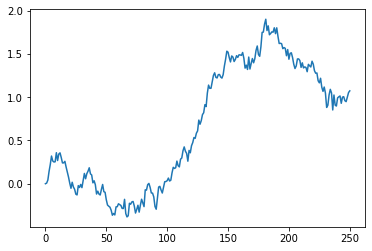

In [4]:
T = 1 # 最終時刻
M = 250 # [0,T] 区間の分割数
delta = T/M # 1区間の長さ
W0 = 0 # 初期値

W = np.zeros(M+1) # ブラウン運動を格納する変数
W[0] = W0

for i in range(M):
  W[i+1] = W[i] + np.sqrt(delta) * np.random.standard_normal(1)

plt.plot(W)
plt.show()

ブラウン運動をシミュレートする。

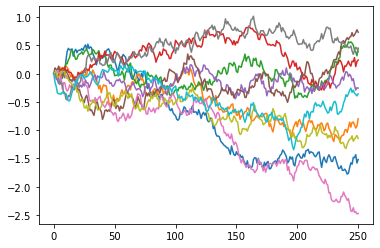

In [5]:
T = 1 # 最終時刻
M = 250 # [0,T] 区間の分割数
delta = T/M # 1区間の長さ
N = 10 # シミュレートする見本過程の数
W0 = 0 # 初期値

W = np.zeros((M+1, N)) # ブラウン運動を格納する変数
W[0, :] = W0

for j in range(N):
  for i in range(M):
    W[i+1, j] = W[i, j] + np.sqrt(delta) * np.random.standard_normal(1)

plt.plot(W)
plt.show()

$X(t) = \mu t + \sigma W(t)$ という形の確率過程を
$(\mu, \sigma)$-ブラウン運動とよぶ。
確率過程 $X(t)$ が $(\mu,\sigma)$-ブラウン運動にしたがうとき

$$
 X(t) \sim \mathrm{BM}(\mu, \sigma^2)
$$

と書くことにする。

また$(\mu, \sigma)$-ブラウン運動からつくられる確率過程

$$
S(t) = S \exp\left\{\mu t + \sigma W(t)\right\},\quad S は定数
$$

を**幾何ブラウン運動**とよび、株価の価格変動モデルによく用いられる。
$S>0$ならば、幾何ブラウン運動は負の値をとらない。

幾何ブラウン運動をシミュレートしてみる。（以下のプログラムは無駄が多い）

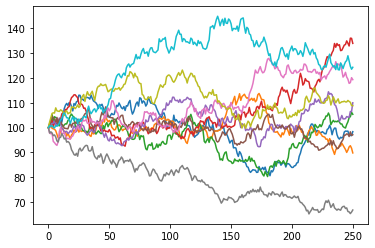

In [6]:
T = 1 # 最終時刻
M = 250 # [0,T] 区間の分割数
delta = T/M # 1区間の長さ
N = 10 # シミュレートする見本過程の数
W0 = 0 # ブラウン運動の初期値

S0 = 100 # 幾何ブラウン運動の初期値
mu = 0.1
sigma = 0.2

W = np.zeros((M+1, N)) # ブラウン運動を格納する変数
W[0, :] = W0

S = np.zeros((M+1, N)) # 幾何ブラウン運動を格納する変数
S[0, :] = S0

for j in range(N):
  for i in range(M):
    W[i+1, j] = W[i, j] + np.sqrt(delta) * np.random.standard_normal(1)
    S[i+1, j] = S0 * np.exp(mu * delta * (i+1) + sigma * W[i+1, j])

plt.plot(S)
plt.show()

## 確率微分方程式

つぎのような「微分方程式」を**確率微分方程式**という。

$$
dX(t) = \mu(X(t))dt + \sigma(X(t))dW(t),\ X(0) = x. 
\tag{1}
$$

じつは (1) は形式的な表現で、確率過程$\{X(t)\}$が
(1) を満たすとは

$$
X(t) = x + \int_{0}^{t}\mu(X(s))ds + \int_{0}^{t}\sigma(X(s))dW(s)
$$

を満たすことを意味する。
右辺第3項目は**確率積分**とよばれるものである。

(1) で$\sigma = 0$とすると

$$
dX(t) = \mu( X(t))dt,\ X(0) = x
$$

が得られる。
これは常微分方程式

$$
\frac{d}{dt}X(t) = \mu(X(t)),\ X(0)=x  \tag{2}
$$

のことである。
例えば、$\mu(X(t)) = \mu X(t)$ ($\mu$は定数)のとき、
この常微分方程式の解が

$$
X(t) = xe^{\mu t}
$$

であることはよいだろう。
確率微分方程式 (1) は常微分方程式 (2) に「ノイズ」
$\sigma(X(t))dW(t)$が加わったものと解釈することができる。

直感的には確率微分方程式（1)をつぎのように解釈する。
(1)の左辺$dX(t)$は微小時間における$X(t)$の変化量とみれ
ばよく、$\Delta t$を微小量としたとき、

$$
dX(t) \approx X(t + \Delta t) - X(t)
$$

と解釈する。
右辺の$dW(t)$も同様に解釈する。

すると、確率微分方程式(1)は$X$の微小時間における変化量が

$$
X(t+\Delta t) - X(t) = \mu(X(t))\Delta t + \sigma(X(t))(W(t + \Delta t) - W(t)) \tag{3}
$$

にしたがうことを記述しているとみることができよう。
ブラウン運動の定義から$W(t + \Delta t) - W(t)$は平均$0$, 分散
$\Delta t$の正規分布にしたがうことに注意して、
式を使うと、$X(0) = x$から始めてつぎつぎと

$$
\begin{split}
  X(\Delta t) &= X(0) + \mu(X(0))\Delta t + \sigma(
  X(0))\sqrt{\Delta t}Z_1\\
  X(2\Delta t) &= X(\Delta t) + \mu(X(\Delta t))\Delta t 
	    + \sigma(X(\Delta t))\sqrt{\Delta t}Z_2\\
	    &\vdots\\
	    X(n\Delta t) &= X((n-1)\Delta t) + \mu(X((n-1)\Delta
	    t))\Delta t 
	    + \sigma(X((n-1)\Delta t))\sqrt{\Delta t}Z_n
	   \end{split}  
$$

のようにして、

$$
X(\Delta t), X(2\Delta t), \dots, X(n \Delta t), \dots
$$

が求まる。
ここで、$Z_1,\dots,Z_n$ は互いに独立な標準正規分布にしたがう確率変数である。
このようにしてできた
$\{X(k\Delta t)\}$（$k=0,1,\dots$）は確率微分方程式(1)の解を近似することが知られている。
よって、$X(0), X(\Delta t), X(2\Delta t),\dots$
をつないでできたグラフを$\{X(t)\}$の見本過程の近似だとみなせば、
(1)を満たす確率過程$\{X(t)\}$の振る舞いがイメージできるだろう。


### 確率微分方程式の例

#### ブラウン運動
$\mu(X(t)) = 0,\ \sigma(X(t)) = 1$の場合、
すなわち

$$
dX(t) = dW(t)
$$

となり、これはブラウン運動そのものである。

#### $(\mu, \sigma)$-ブラウン運動
$\mu(X(t)) = \mu (定数),\ \sigma(X(t)) = \sigma(定数)$
の場合、すなわち

$$
dX(t) = \mu dt + \sigma dW(t)
$$
となる。これは$(\mu, \sigma)$-ブラウン運動である。
$\sigma = 0$だと、$X(t) =\mu t$であり、それにノイズ$\sigma dW(t)$が加わるので、直線$\mu t$の周辺をジグザグ
に動くような見本過程になる。

#### 対数正規過程
$\mu(X(t)) = \mu X(t),\ \sigma(X(t)) = \sigma
X(t)$ ($\mu,\sigma$は定数)の場合、

$$
dX(t) = \mu X(t)dt + \sigma X(t)dW(t) \tag{4}
$$

となる。
これは対数正規過程またはBlack-Scholes（ブラック-ショールズ）モデルとよばれ、 株価変動のモデル化に使われるもっとも基本的な確率過程である。
(4)を

$$
\frac{dX(t)}{X(t)} = \mu dt + \sigma dW(t)
$$

と変形し、さらに

$$
\frac{X(t+\Delta t) - X(t)}{X(t)} = \mu \Delta t +
		   \sigma (W(t + \Delta t) - W(t))
$$

と離散近似する。
この左辺は$\{X(t)\}$の時刻$t$から$t + \Delta t$における収益率を表しているから、
(4)は収益率が正規分布
$N(\mu \Delta t, \sigma^2\Delta t)$
にしたがうことを意味する。
じつは、(4)の解は

$$
X(t) = x\exp\left\{\left(\mu - \frac12 \sigma^2\right)t + \sigma W(t)\right\}
$$

であるが、
これを確認するには**伊藤の公式**を使わなければならない。

#### その他
その他、ファイナンスでよく使われる確率微分方程式に

$$
 dX(t) = \lambda(\bar{X} - X(t))dt + \sigma dW(t)\quad
  (\text{Ornstein-Uhlenbeck過程})  \tag{5}
$$

$$
 dX(t) = \lambda(\bar{X} - X(t))dt + \sigma \sqrt{X(t)}dW(t)\quad
(\text{Feller過程，平方根過程}) \tag{6}
$$

がある。

## 確率微分方程式のシミュレート

確率微分方程式の解の見本過程をモンテカルロ法によりシミュレートする。
Orunstein-Uhlenbeck過程(5)の解$X(t)$をシミュレートしてみよう。
(5)を離散近似すると

$$
\begin{split}
 	   X((n+1)\Delta t) &= X(n\Delta t) 
      + \lambda(\bar{X} - X(n\Delta t)) \Delta t + \sigma
	    (W((n+1)\Delta t) - W(n\Delta t))\\
	    &= X(n\Delta t) + \lambda(\bar{X} - X(n\Delta t)) \Delta t + \sigma\sqrt{\Delta t}Z_n,\ n
 = 0,1,\dots
\end{split}	  
$$

となる。
$[0,1]$区間を$M$分割すると，$\Delta t = 1/M$となる．$X(n\Delta
	  t) = X_n$とおけば

$$
X_{n+1}= X_n + \lambda(\bar{X} - X_n) \Delta t + \sigma\sqrt{\Delta t}Z_n,\  n=0,1,\dots
$$

という反復法を考えることになる。
$Z_1, Z_2, \dots$は互いに独立な標準正規分布にしたがう確率変数。


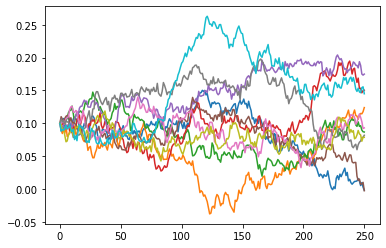

In [7]:
T = 1 # 最終時刻
M = 250 # [0,T] 区間の分割数
delta = T/M # 1区間の長さ
N = 10 # シミュレートする見本過程の数

X0 = 0.1 # OU過程の初期値
lmd = 0.5 # OU過程のパラメータ
barX = 0.1
sigma = 0.1

X = np.zeros((M+1, N)) # OU過程の値を格納する変数
X[0, :] = X0

for j in range(N):
  for i in range(M):
     X[i+1, j] = X[i, j] + lmd * (barX - X[i, j]) * delta + sigma * np.sqrt(delta) * np.random.standard_normal(1)

plt.plot(X)
plt.show()

**演習問題**
Feller過程(6)をシミュレートするプログラムを作成せよ。

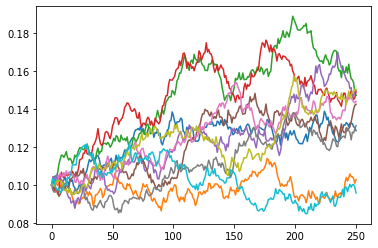

In [8]:
T = 1 # 最終時刻
M = 250 # [0,T] 区間の分割数
delta = T/M # 1区間の長さ
N = 10 # シミュレートする見本過程の数

X0 = 0.1 # OU過程の初期値
lmd = 0.5 # OU過程のパラメータ 
barX = 0.2
sigma = 0.1

X = np.zeros((M+1, N)) # OU過程の値を格納する変数
X[0, :] = X0

for j in range(N):
  for i in range(M):
    X[i+1, j] = X[i, j] + lmd * (barX - X[i, j]) * delta + sigma * np.sqrt(X[i, j]) * np.sqrt(delta) * np.random.standard_normal(1)

plt.plot(X)
plt.show()

対数正規過程(4)は離散近似をしないで、シミュレートすることができる。
(4)の解が

$$
X(t) = x\exp\left\{\left(\mu - \frac12 \sigma^2\right)t + \sigma W(t)\right\}
$$

であることを用いると、

$$
X(t + \Delta t) = X(t)\exp\left\{\left(\mu - \frac12 \sigma^2\right) \Delta t + \sigma (W(t + \Delta t) - W(t))\right\}
$$

となる。よって、この式を用いて、$X(0)=x$からスタートして

$$
X(\Delta t) = X(0)\exp\left\{\left(\mu - \frac12 \sigma^2\right)\Delta t + \sigma \sqrt{\Delta t}Z_1\right\}
$$

$$
X(2\Delta t) = X(\Delta t)\exp\left\{\left(\mu - \frac12 \sigma^2\right)\Delta t + \sigma \sqrt{\Delta t}Z_2\right\}
$$

$$
\vdots
$$

$$
X(n\Delta t) = X((n-1)\Delta t)\exp\left\{\left(\mu - \frac12 \sigma^2\right)\Delta t + \sigma \sqrt{\Delta t}Z_n\right\}
$$

によりシミュレートすることができる。

**演習問題**
対数正規過程(4)をシミュレートするプログラムを作成せよ。

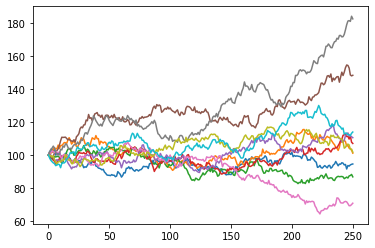

In [10]:
T = 1 # 最終時刻
M = 250 # [0,T] 区間の分割数
delta = T/M # 1区間の長さ
N = 10 # シミュレートする見本過程の数

S0 = 100 # BS過程の初期値
mu = 0.1
sigma = 0.2

S = np.zeros((M+1, N)) # OU過程の値を格納する変数
S[0, :] = S0

for j in range(N):
  for i in range(M):
     S[i+1, j] = S[i, j] * np.exp((mu - 0.5*sigma**2) * delta + sigma * np.sqrt(delta) * np.random.standard_normal(1))

plt.plot(S)
plt.show()

## オプション価格理論

現時点を$0$，将来のある時点を$T$とする。
ある資産の価格が

$$
	dS(t) = \mu S(t)dt + \sigma S(t)dW(t),\quad S(0) = S_0 > 0 \tag{7}
$$

にしたがうと仮定する。
満期$T$、行使価格$K$の**ヨーロピアンコールオプション**とは、
時点$T$にこの資産を価格$K$で購入する**権利**のことである。
満期におけるこのオプションの支払いは

$$
	(S(T) - K)^+
$$

となる。
ただし、$x^+ = \max\{0, x\}$とする。
行使時点があらかじめ決められているオプションを一般に
**ヨーロピアンオプション**とよぶ。

一般には関数$f \colon \mathbb{R} \to \mathbb{R}$に対して
$$
	f(S(T))
$$
を支払いとするオプションを考えることができる。

さらには、$T$時点までの情報により確定する支払い
をもつオプションも考えることができる。例えば、ノックアウトオプション

$$f\left(S(T)\right)I\left\{\max_{0\leq t \leq T}S(t) < B\right\}
$$

やアジア型オプション

$$
f\left(\frac{1}{n}\sum_{i=1}^nS(t_i)\right)
$$

がある。

リスク中立化法（マルチンゲールアプローチ）によれば、
$T$時点までの情報により確定する支払い$F$を持つオプションの価格は支払いの現在価値を計算し、そのリスク中立確率のもとで期待値

$$
E^Q\left[e^{-rT}F\right]
$$

がオプションの価格となる。
ここで、 $E^Q$はリスク中立確率のもとでの期待値を表す。
また、無リスク金利 $r$ は定数とする。

例えば、ヨーロピアンコールオプションの価格は

$$
E^Q\left[e^{-rT}(S(T) - K)^+\right]
$$

によって計算することができる。

リスク中立確率についてはこの講義では説明しないが、
じつはリスク中立確率のもとで、確率過程(7)は

$$
dS(t) = rS(t)dt + \sigma S(t)dW^Q(t),\ S(0) = S_0 > 0 \tag{8}
$$
にしたがう。(8)の解は

$$
S(t) = S_0 \exp\left\{\left(r - \frac{\sigma^2}{2}\right)t + \sigma W^Q(t)\right\}
$$

ここで、$\{W^Q(t)\}$はリスク中立確率$Q$のもとでのブラウン運動である。
(7)と(8)の違いは$S(t)dt$の係数(瞬間的な収益率)が$r$になってる点と、
ブラウン運動$\{W(t)\}$が別のブラウン
運動に置き換わっている点である。

これを認めると$S(T)$は対数正規分布にしたがう確率変数には変わりないので、
期待値 $E^Q[e^{-rT}(S(T) - K)^+]$ を計算することができる。

この講義では、議論を(8)式、
つまり「リスク中立確率のもとで株価過程が〜にしたがう」というところから始めるので、どのようにリスク中立確率が求められるか分からなくても差し支えない。

また、原資産の価格が対数正規過程(7)以外のより一般的な確率過程に従う場合でも、同様のことが言える。


**演習問題**
株価過程がリスク中立確率のもとで対数正規過程

$$
dS(t) = rS(t)dt + \sigma S(t) dW(t) \tag{9}
$$

にしたがうとき、

ノックアウトオプション

$$(S(T) - K)^+ I\left\{\max_{0\leq t \leq T}S(t) < B\right\}
$$

の価格をモンテカルロシミュレーションにより求めてみる。

(9)の解が

$$
S(t) = S_0 \exp\left\{\left(r - \frac{\sigma^2}{2}\right)t + \sigma W(t)\right\}
$$

であることを使う。

In [12]:
T = 1 # 最終時刻
M = 250 # [0,T] 区間の分割数
delta = T/M # 1区間の長さ
N = 10000 # シミュレートする見本過程の数

S0 = 100 # BSモデルのパラメータ
K = 99
r = 0.01
sigma = 0.2

B = 120 # バリアの値

payoff = np.zeros(N)

for j in range(N):
  S = np.zeros(M+1)
  S[0] = S0
  
  for i in range(M):
    S[i+1] = S[i] * np.exp((r - 0.5*sigma**2) * delta + sigma * np.sqrt(delta) * np.random.standard_normal(1))
  
  payoff[j] = np.maximum(S[M] - K, 0) * (np.max(S) < B)

price = np.exp(-r * T) * payoff.mean()
print(price)

1.5095290083304116
